In [98]:
import pandas as pd
from plotnine import *

In [99]:
# Load Individual View Level Data
data = pd.read_csv("C:\\Users\\CHOUBJU1\\OneDrive - Novartis Pharma AG\\Desktop\\Raunak Tableau Views Analysis\\Compile_Final_Data.csv")
data.head()

,ID,Workbook,View,Total_Views
0,MAHAJAK1,Cosentyx 360,Activation,25
1,SRIVASAF,Cosentyx 360,Activation,13
2,BARAVJO1,Cosentyx 360,Activation,6
3,LESHEEL1,Cosentyx 360,Activation,6
4,MAJIPR1,Cosentyx 360,Activation,6


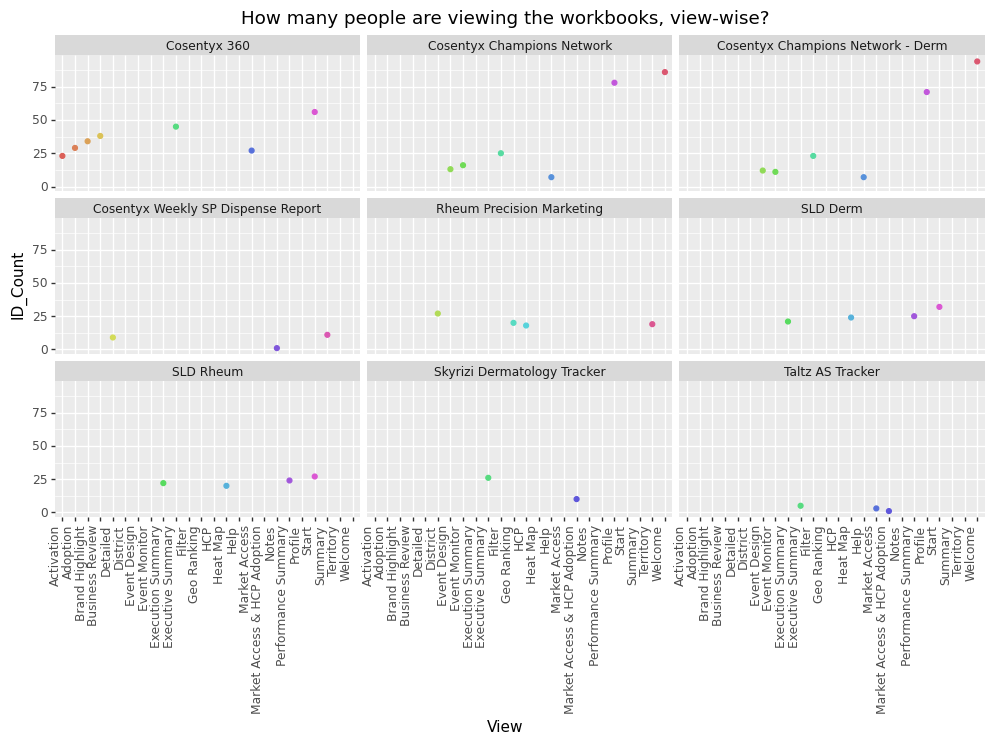

<ggplot: (-9223371858356098336)>

In [123]:
# Check for number of people (Count(ID))
# To see if, 1 person is viewing 10 times or if 10 people are viewing it 1 times each
df_1 =  data.groupby(['Workbook','View']).count()['ID'].reset_index()
df_1 = df_1.rename(columns=({'ID':'ID_Count'}))

# Plot Each View/Click per Workbook
(ggplot(df_1)
+ aes(x = "View", 
     y = "ID_Count",
     color="View")
+ geom_point()
+ labs(title='How many people are viewing the workbooks, view-wise?')
+ theme(axis_text_x=element_text(rotation=90, hjust=1),figure_size=(12,6))
+ scale_color_discrete(guide=False)
+ facet_wrap("Workbook"))


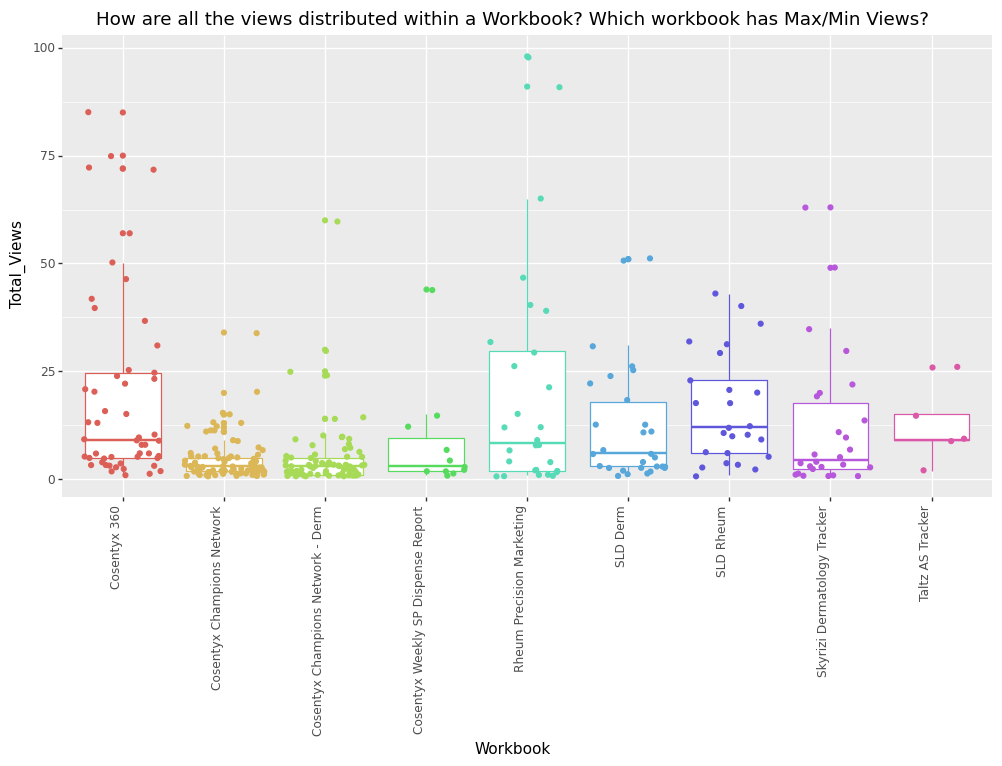

<ggplot: (-9223371858356280376)>

In [160]:
# Observation: Start & Welcome Pages have heavy traffic - but are default pages. 
# Action     : Remove Start & Welcome Pages
data_2 = data[~data['View'].isin(['Start','Welcome'])]

# Rollup Views at Per Person Level
df_2 =  data_2.groupby(['ID','Workbook'])['Total_Views'].agg(sum).reset_index()

# Lets assess the workbook views post removing outliers

(ggplot(df_2)
 + aes(x = "Workbook", 
     y = "Total_Views",
     color="Workbook")
 + geom_boxplot()
 + geom_jitter()
 + labs(title='How are all the views distributed within a Workbook? Which workbook has Max/Min Views?')
 + theme(axis_text_x=element_text(rotation=90, hjust=1),figure_size=(12,6))
 + scale_color_discrete(guide=False)
)

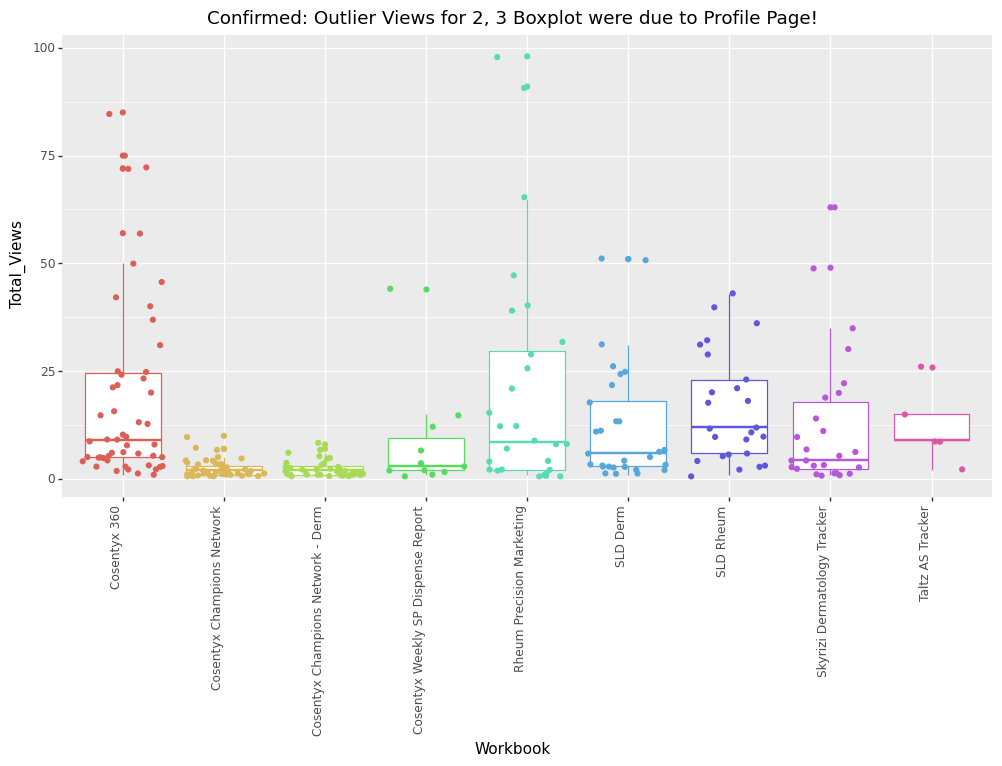

<ggplot: (-9223371858356965044)>

In [135]:
# Observation: Profile Page is driving the views. Lets Remove it and then check:
data_3 = data_2[~data_2['View'].isin(['Profile'])]

# Rollup Views at Per Person Level
df_3 =  data_3.groupby(['ID','Workbook'])['Total_Views'].agg(sum).reset_index()

# Lets assess the workbook views post removing outliers

(ggplot(df_3)
 + aes(x = "Workbook", 
     y = "Total_Views",
     color="Workbook")
 + geom_boxplot()
 + geom_jitter()
 + labs(title='Confirmed: Outlier Views for 2, 3 Boxplot were due to Profile Page!')
 + theme(axis_text_x=element_text(rotation=90, hjust=1),figure_size=(12,6))
 + scale_color_discrete(guide=False)
)

C:\Users\CHOUBJU1\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\stats\stat.py:311: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  stats = pd.concat(stats, axis=0, ignore_index=True)


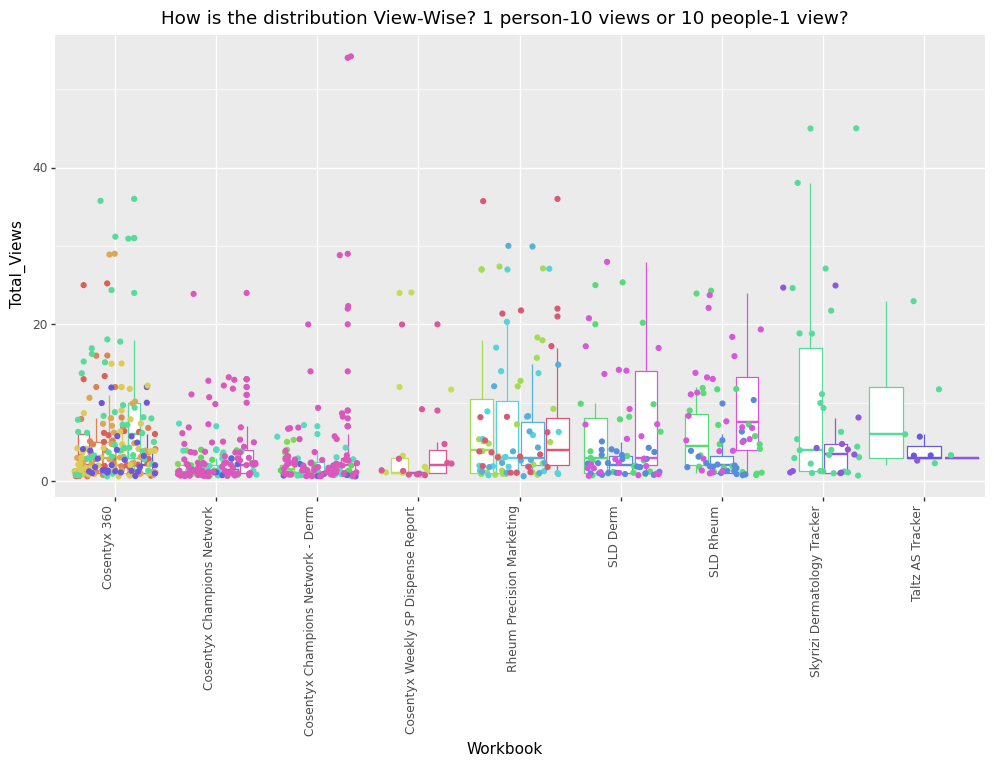

<ggplot: (-9223371858352331636)>

In [162]:
# Let scheck it View wise!

(ggplot(data_2)
 + aes(x = "Workbook", 
     y = "Total_Views",
     color="View")
 + geom_boxplot()
 + geom_jitter()
 + labs(title='How is the distribution View-Wise? 1 person-10 views or 10 people-1 view?')
 + theme(axis_text_x=element_text(rotation=90, hjust=1),figure_size=(12,6))
 + scale_color_discrete(guide=False)
)

C:\Users\CHOUBJU1\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\stats\stat.py:311: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  stats = pd.concat(stats, axis=0, ignore_index=True)


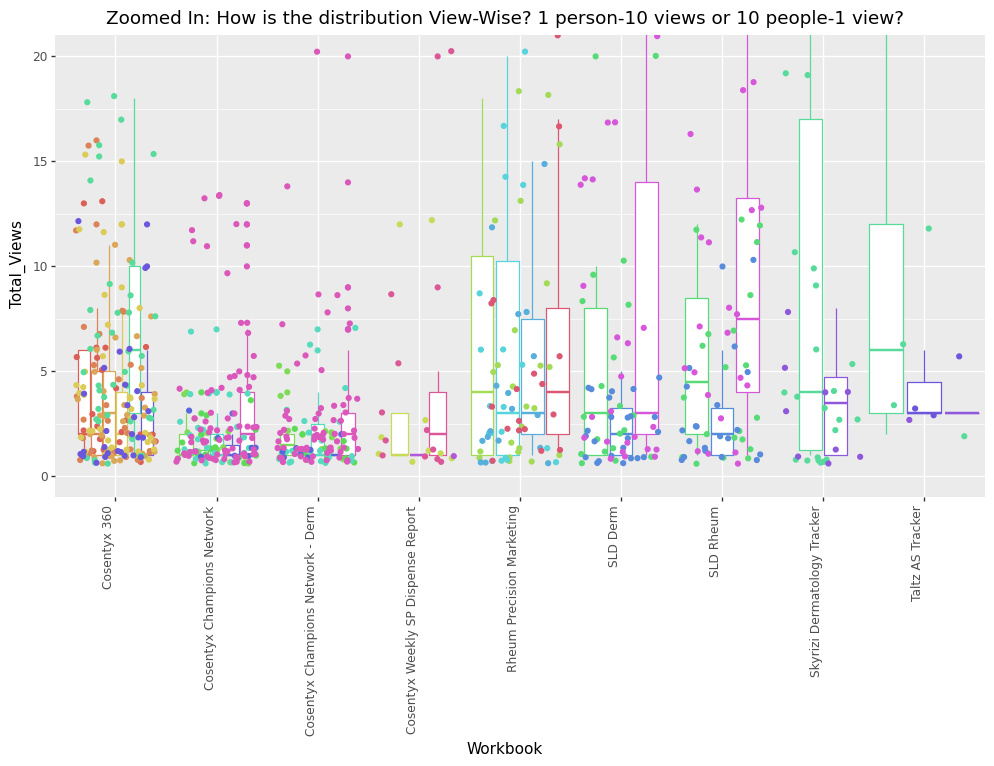

<ggplot: (-9223371858353521452)>

In [163]:
# Let's Zoom In!

(ggplot(data_2)
 + aes(x = "Workbook", 
     y = "Total_Views",
     color="View")
 + geom_boxplot()
 + geom_jitter()
 + labs(title='Zoomed In: How is the distribution View-Wise? 1 person-10 views or 10 people-1 view?')
 + theme(axis_text_x=element_text(rotation=90, hjust=1),figure_size=(12,6))
 + scale_color_discrete(guide=False)
 + coord_cartesian(ylim=(0, 20)))

In [ ]:
#---------------------------------------------------------------------------------------------------------------------

In [169]:
# Load Day Level Views Data
df = pd.read_csv("C:\\Users\\CHOUBJU1\\OneDrive - Novartis Pharma AG\\Desktop\\Raunak Tableau Views Analysis\\Per_Day_Data.csv")
df['Day'] = pd.to_datetime(df['Day'])
df.head()

,Day,Total_Views,Workbook
0,2019-09-26,4,Cosentyx 360
1,2019-09-27,23,Cosentyx 360
2,2019-09-30,11,Cosentyx 360
3,2019-10-01,5,Cosentyx 360
4,2019-10-02,8,Cosentyx 360


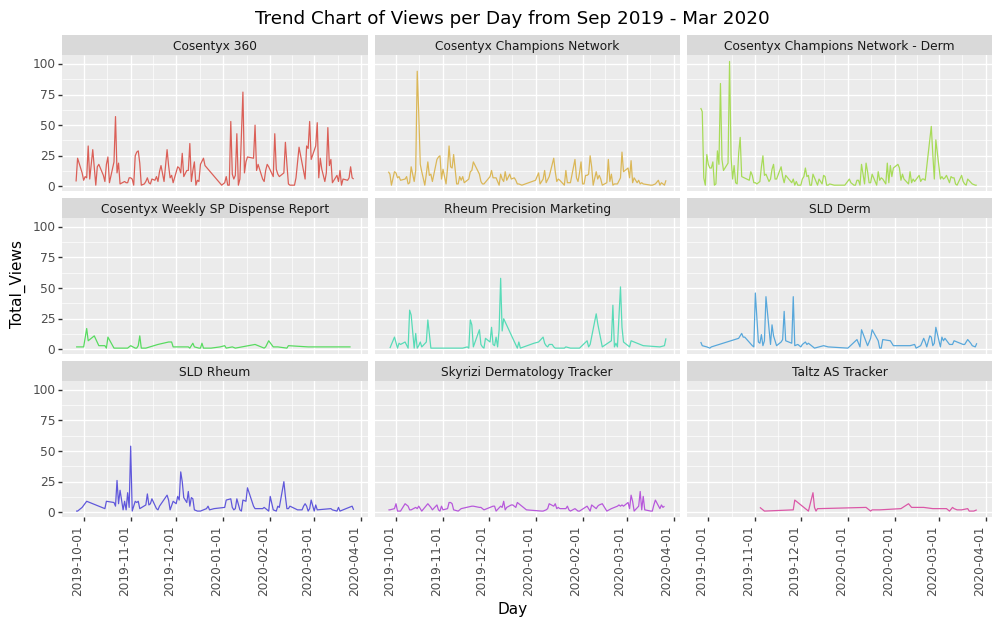

<ggplot: (-9223371858359174848)>

In [173]:
(ggplot(df)
 + aes(x = "Day",
     y = "Total_Views",
     color = "Workbook")
 + geom_line()
 + labs(title='Trend Chart of Views per Day from Sep 2019 - Mar 2020')
 + theme(axis_text_x=element_text(rotation=90, hjust=1),figure_size=(12,6))
 + scale_color_discrete(guide=False)
 + facet_wrap("Workbook")
)